# Crowd Density Estimator

## Mouting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from mpl_toolkits.axes_grid1 import ImageGrid

# Reading the CSV file

In [2]:
label_df = pd.read_csv('labels.csv')
label_df.columns = ['id' , 'people']
label_df.head()

id  people
0   1      35
1   2      41
2   3      41
3   4      44
4   5      41

# Reading Image Dataset

In [3]:
img = np.load('/content/drive/MyDrive/images.npy')
img.shape

(2000, 480, 640, 3)

In [4]:
labels = np.array(label_df['people'])
labels

array([35, 41, 41, ..., 25, 26, 26])

# Train Test Split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(img, labels, test_size=0.1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1800, 480, 640, 3) (1800,)
(200, 480, 640, 3) (200,)


# Determining Image Shape

In [6]:
X_train.shape[1:4]

(480, 640, 3)

# Building The 2 Layered CNN Model

In [7]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(64, (3,3), input_shape=X_train.shape[1:4], activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
    
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 478, 638, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 239, 319, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 237, 317, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 118, 158, 128)     0         
_________________________________________________________________
dropout (Dropout)            (None, 118, 158, 128)     0         
_________________________________________________________________
flatten (Flatten)            (None, 2386432)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               3

# Compiling with ADAM optimizer and Mean Square Error Loss Function

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-5), loss=tf.keras.losses.MeanSquaredError(),  metrics=['mae'])

# Fitting the Dataset into the Model

In [10]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
57/57 [==============================] - 67s 576ms/step - loss: 93563.6755 - mae: 129.3886 - val_loss: 48.3223 - val_mae: 5.7289
Epoch 2/100
57/57 [==============================] - 31s 545ms/step - loss: 46.4262 - mae: 5.5008 - val_loss: 40.0496 - val_mae: 4.8614
Epoch 3/100
57/57 [==============================] - 32s 555ms/step - loss: 28.6285 - mae: 4.1890 - val_loss: 19.6998 - val_mae: 3.4699
Epoch 4/100
57/57 [==============================] - 31s 550ms/step - loss: 21.7720 - mae: 3.6961 - val_loss: 23.0133 - val_mae: 3.6968
Epoch 5/100
57/57 [==============================] - 31s 549ms/step - loss: 20.7518 - mae: 3.6397 - val_loss: 37.8365 - val_mae: 5.4207
Epoch 6/100
57/57 [==============================] - 31s 552ms/step - loss: 20.2304 - mae: 3.6390 - val_loss: 10.7177 - val_mae: 2.7234
Epoch 7/100
57/57 [==============================] - 31s 551ms/step - loss: 11.4335 - mae: 2.7165 - val_loss: 9.8525 - val_mae: 2.6076
Epoch 8/100
57/57 [=========================

# Saving the Model into System

In [42]:
model.save("model_brain.h5")

In [12]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

# Loss vs Validation Loss Plot

In [6]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(y=history.history['loss'], name='Loss',
                         line=dict(color='royalblue', width=3)))
fig.add_trace(go.Scatter(y=history.history['val_loss'], name='Val_Loss',
                         line=dict(color='firebrick', width=2)))


# MAE vs Validation MAE Plot

In [3]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=history.history['mae'], name='MAE',
                         line=dict(color='royalblue', width=3)))
fig.add_trace(go.Scatter(y=history.history['val_mae'], name='Val_MAE',
                         line=dict(color='firebrick', width=3)))

# Testing on Sample Images

Number of people in photo 1 : 35
Number of people in photo 2 : 41
Number of people in photo 3 : 41
Number of people in photo 4 : 44
Number of people in photo 5 : 41
Number of people in photo 6 : 41
Number of people in photo 7 : 35
Number of people in photo 8 : 36
Number of people in photo 9 : 27
Number of people in photo 10 : 24
Number of people in photo 11 : 16
Number of people in photo 12 : 22
Number of people in photo 13 : 23
Number of people in photo 14 : 25
Number of people in photo 15 : 15
Number of people in photo 16 : 16
Number of people in photo 17 : 15
Number of people in photo 18 : 25
Number of people in photo 19 : 31
Number of people in photo 20 : 25
Number of people in photo 21 : 24
Number of people in photo 22 : 26
Number of people in photo 23 : 23
Number of people in photo 24 : 23
Number of people in photo 25 : 22


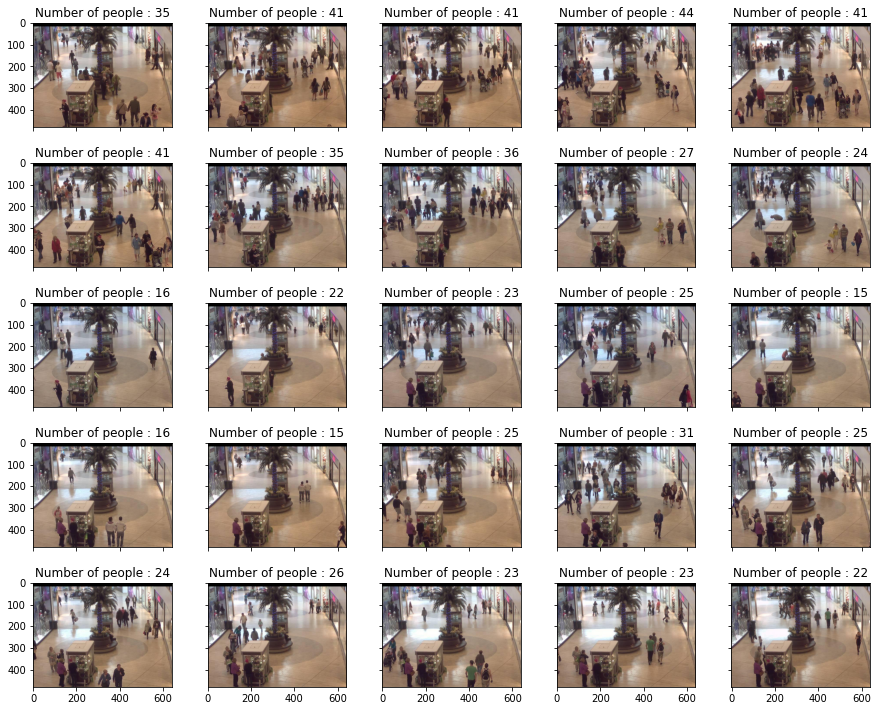

In [41]:
fig = plt.figure(figsize=(15,15))
grid = ImageGrid(
        fig, 111,
        nrows_ncols=(5,5),
        axes_pad=0.5
)

for x in range(0,25):
    print(f"Number of people in photo {x+1} : {labels[x]}")
    grid[x].set_title('Number of people : ' + str(labels[x]))
    grid[x].imshow(img[x])
    